In [18]:
import numpy as np
import matplotlib.pyplot as plt

def fft(signal: np.ndarray, signal_freq: float, sample_freq: float, window=np.hamming) -> tuple:
    N = int(((len(signal) / sample_freq) // ( 1 / signal_freq)) * round((1 / signal_freq) * sample_freq))

    signal = signal[:N]
    t = np.linspace(0, N // sample_freq, N) * signal_freq / 2

    H = np.fft.rfft(signal * window(len(signal)), N)
    H_dB = 20 * np.log10(abs(H))
    freq = np.linspace(0, fs / 2, len(H)) * 2 / signal_freq

    return (freq, H_dB)

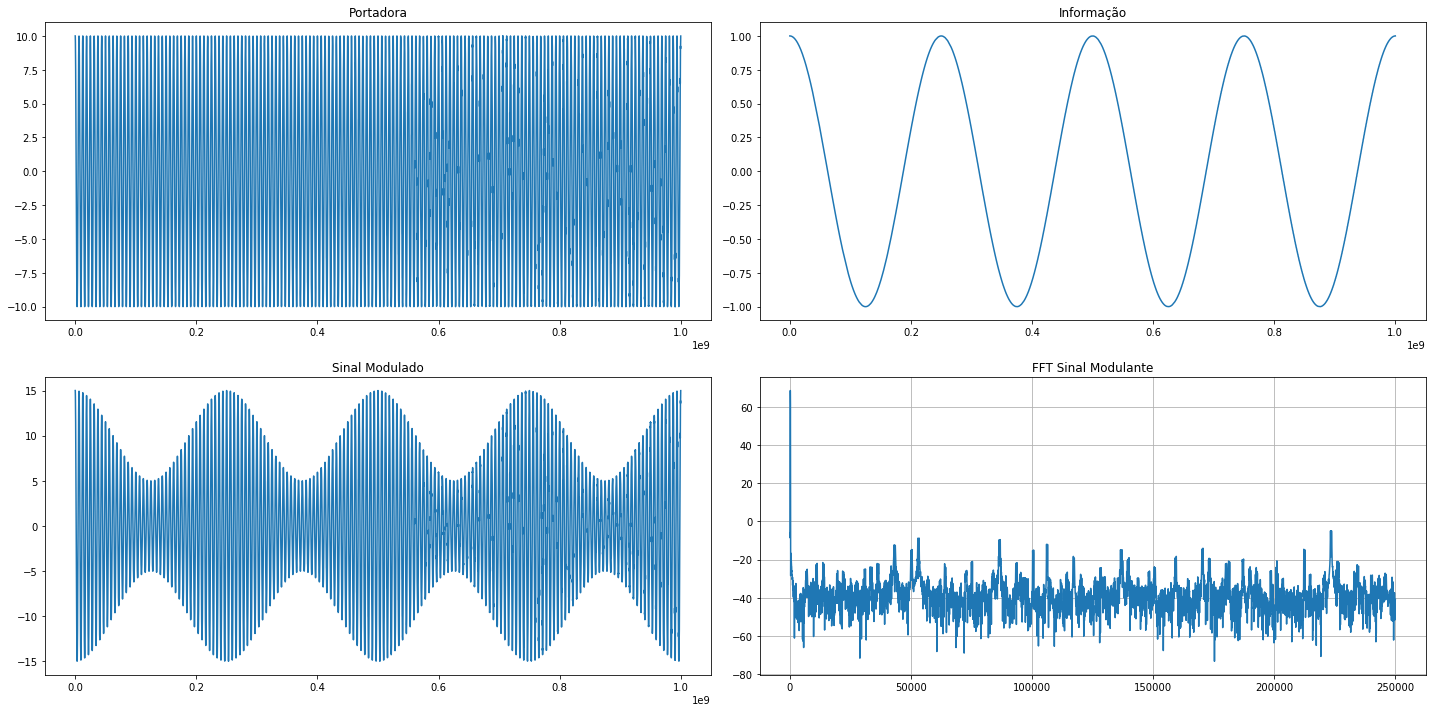

In [21]:
fw = 1e4
fs = 1e9
t = np.linspace(0, fs, int(fw))

f0 = 160e3
fm = 4e3
E0 = 10
Em = 1

# Portadora
w0 = 2 * np.pi * f0
theta0 = 0
e0 = E0 * np.cos(w0 * t + theta0)

# Modulante
wm = 2 * np.pi * fm
thetam = 0
em = Em * np.cos(wm * t + thetam)

# Modulado
k = 0.5
e = e0 * (1 + k * em)

# Plots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.title(f"AM BSD k={k}")

axis[0][0].set_title("Portadora")
axis[0][0].plot(t, e0)
axis[0][1].set_title("Informação")
axis[0][1].plot(t, em)
axis[1][0].set_title("Sinal Modulado")
axis[1][0].plot(t, e)
axis[1][1].set_title("FFT Sinal Modulante")
axis[1][1].plot(*fft(em, fm, fm * 10))
# axis[1][1].set_xlim([0,10*fm])
axis[1][1].grid()

plt.tight_layout()
plt.show()